<a href="https://colab.research.google.com/github/danielPanah/Nash_Equilibrium/blob/main/Papers_Nash_equilibrium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

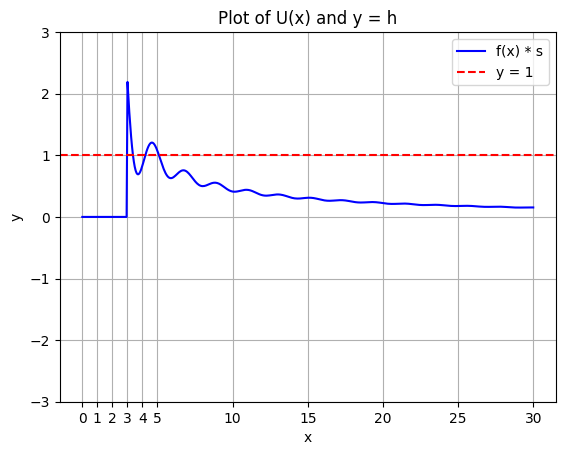

In [25]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Definition of the function f(x)
def f(x):
    if x < m:
        return 0
    numerator = (math.sin(3 * (x-0.5) - 5) / (3 * (x-0.5) - 5) + 0.5)/x
    return numerator

def g(y):
    num = 1
    return num

# Parameters (from your previous code)
s = 9
h = 1

# Generate x values
x_vals = np.linspace(0, 30, 500)

# Compute f(x)*s values
f_s_vals = [f(x) * s * g(1) for x in x_vals] # for arbtrary y, for instance y = 1

# Plot f(x)*s
plt.plot(x_vals, f_s_vals, label="f(x) * s", color="blue")

# Plot y = h
plt.axhline(y=h, color="red", linestyle="--", label=f"y = {h}")

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of U(x) and y = h")
plt.legend()
plt.grid(True)
plt.ylim(-3, 3)
plt.xticks([0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30])

plt.show()


In [32]:
import math
import itertools

# Definition of the function f(x)
def f(x):
    numerator = math.sin(3 * (x-0.5) - 5) / (3 * (x-0.5) - 5) + 0.5
    return numerator

# Definition of the function g(y)
def g(y):
    # num = 1 - 0.01 * y
    num = 1
    return num

# Function to generate all valid group configurations
def generate_and_increment_arrays(p, m, n):
    valid_arrays = []

    # Each element in the array can be either 0 or a value >= m,
    # as long as the non-increasing order and the total sum <= n are satisfied.
    # To avoid infinite search, we naturally bound choices by remaining sum and previous value.

    def backtrack(idx, last_allowed, remaining_sum, current):
        # When we have built an array of length p, record it
        if idx == p:
            valid_arrays.append(list(current))
            return

        # Option 1: choose 0 here. After placing a 0, only 0s can follow to keep non-increasing order.
        current.append(0)
        backtrack(idx + 1, 0, remaining_sum, current)
        current.pop()

        # Option 2: choose a positive value v >= m, but not exceeding last_allowed and remaining_sum
        # This enforces non-increasing order and total-sum constraint.
        upper = min(last_allowed, remaining_sum)
        for v in range(upper, m - 1, -1):
            current.append(v)
            backtrack(idx + 1, v, remaining_sum - v, current)
            current.pop()

    # Start the backtracking with the widest allowed value (n) and full remaining sum (n)
    backtrack(idx=0, last_allowed=n, remaining_sum=n, current=[])
    return valid_arrays



def process_allcases(allcases, s, h, p, n):
    nash_equilibria = []
    for idx, array in enumerate(allcases):
        print(f"\nProcessing array {idx + 1}: {array}")
        con = 1
        counter = 1
        y = sum(1 for x in array if x != 0)

        for num in array:
            if num == 0:
                break  # Skip further checks after the first 0
            else:
                U_current = (s * f(num) * g(y)) / num

                # NEW boundary rule: if we "reach n", only check h < U_current
                if num == n:
                    if not (h < U_current):   # strict inequality per your request
                        con = 0
                else:
                    U_next = (s * f(num + 1) * g(y)) / (num + 1)
                    if not (U_next <= h <= U_current):
                        con = 0

            counter += 1
            print(num, end=" ")

        if array == [0] * p:
            con = 1  # Always a Nash equilibrium

        print("\n condition (its a Nash equilibrium = 1 / its not = 0):")
        print(con)

        if con == 1:
            nash_equilibria.append(array)

    return nash_equilibria


# Parameters
m = 3  # Value for `m`
s = 9  # Value of the s
h = 1  # Value of the h
n = 30 # Number of hunters
p = n // m  # Size of the array

# Generate and print the arrays
allcases = generate_and_increment_arrays(p, m, n)

print("Groups that are formed:")
for case in allcases:
    print(case)

# Process the arrays as described
print("\nProcessing allcases:")
nash_list = process_allcases(allcases, s, h, p, n)  # <-- capture result

# ---- print all Nash equilibria in one place
print("\nAll Nash equilibria (collected):")
for arr in nash_list:
    print(arr)
print(f"\nTotal Nash equilibria: {len(nash_list)}")


Groups that are formed:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[30, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[29, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[28, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[27, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[27, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[26, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[26, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[26, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 5, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 6, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 5, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[23, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 6, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 5, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 4, 3, 0, 0, 0, 0, 0, 0, 0]
[23, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[22, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 8, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 6, 0, 0, 0, 

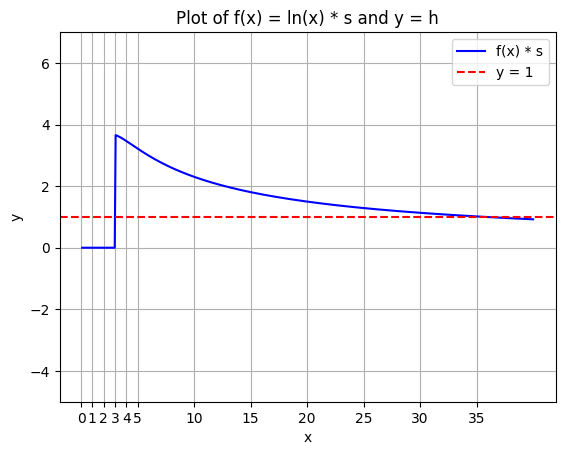

In [19]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Definition of the function f(x) = ln(x)
def f(x):
    if x < m:
        return 0
    return math.log(x) / (x * 0.9)

def g(y):
    num = 1
    return num

# Parameters
s = 9
h = 1
m = 3

# Generate x values (avoid 0)
x_vals = np.linspace(0.1, 40, 500)

# Compute f(x)*s values
f_s_vals = [f(x) * s * g(1) for x in x_vals] # for an arbtrary y, for instance y = 1

# Plot f(x)*s
plt.plot(x_vals, f_s_vals, label="f(x) * s", color="blue")

# Plot y = h
plt.axhline(y=h, color="red", linestyle="--", label=f"y = {h}")

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of U(x) and y = h")
plt.legend()
plt.grid(True)
plt.ylim(-5, 7)
plt.xticks([0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35])

plt.show()


In [31]:
import math
import itertools

# Definition of the function f(x)
def f(x):
    numerator = math.log(x)/0.9
    return numerator

# Definition of the function g(y)
def g(y):
    # num = 1 - 0.01 * y
    num = 1
    return num

# Function to generate all valid group configurations
def generate_and_increment_arrays(p, m, n):
    valid_arrays = []

    # Each element in the array can be either 0 or a value >= m,
    # as long as the non-increasing order and the total sum <= n are satisfied.
    # To avoid infinite search, we naturally bound choices by remaining sum and previous value.

    def backtrack(idx, last_allowed, remaining_sum, current):
        # When we have built an array of length p, record it
        if idx == p:
            valid_arrays.append(list(current))
            return

        # Option 1: choose 0 here. After placing a 0, only 0s can follow to keep non-increasing order.
        current.append(0)
        backtrack(idx + 1, 0, remaining_sum, current)
        current.pop()

        # Option 2: choose a positive value v >= m, but not exceeding last_allowed and remaining_sum
        # This enforces non-increasing order and total-sum constraint.
        upper = min(last_allowed, remaining_sum)
        for v in range(upper, m - 1, -1):
            current.append(v)
            backtrack(idx + 1, v, remaining_sum - v, current)
            current.pop()

    # Start the backtracking with the widest allowed value (n) and full remaining sum (n)
    backtrack(idx=0, last_allowed=n, remaining_sum=n, current=[])
    return valid_arrays


def process_allcases(allcases, s, h, p, n):
    nash_equilibria = []
    for idx, array in enumerate(allcases):
        print(f"\nProcessing array {idx + 1}: {array}")
        con = 1
        counter = 1
        y = sum(1 for x in array if x != 0)

        for num in array:
            if num == 0:
                break  # Skip further checks after the first 0
            else:
                U_current = (s * f(num) * g(y)) / num

                # NEW boundary rule: if we "reach n", only check h < U_current
                if num == n:
                    if not (h < U_current):   # strict inequality per your request
                        con = 0
                else:
                    U_next = (s * f(num + 1) * g(y)) / (num + 1)
                    if not (U_next <= h <= U_current):
                        con = 0

            counter += 1
            print(num, end=" ")

        if array == [0] * p:
            con = 1  # Always a Nash equilibrium

        print("\n condition (its a Nash equilibrium = 1 / its not = 0):")
        print(con)

        if con == 1:
            nash_equilibria.append(array)

    return nash_equilibria

# Parameters
m = 3  # Value for `m`
s = 9  # Value of the s
h = 1  # Value of the h
n = 30 # Number of hunters
p = n // m  # Size of the array

# Generate and print the arrays
allcases = generate_and_increment_arrays(p, m, n)

print("Groups that are formed:")
for case in allcases:
    print(case)

# Process the arrays as described
print("\nProcessing allcases:")
nash_list = process_allcases(allcases, s, h, p, n)  # <-- capture result

# ---- print all Nash equilibria in one place
print("\nAll Nash equilibria (collected):")
for arr in nash_list:
    print(arr)
print(f"\nTotal Nash equilibria: {len(nash_list)}")


Groups that are formed:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[30, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[29, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[28, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[27, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[27, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[26, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[26, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[26, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 5, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 6, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 5, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[23, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 6, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 5, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 4, 3, 0, 0, 0, 0, 0, 0, 0]
[23, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[22, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 8, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 6, 0, 0, 0, 

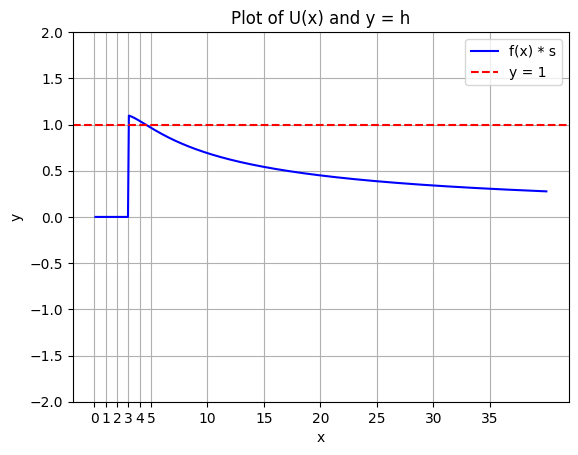

In [24]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Definition of the function f(x) = ln(x)
def f(x):
    if x < m:
        return 0
    return math.log(x) / (x * 3)

def g(y):
    num = 1
    return num

# Parameters
s = 9
h = 1
m = 3

# Generate x values (avoid 0)
x_vals = np.linspace(0.1, 40, 500)

# Compute f(x)*s values
f_s_vals = [f(x) * s * g(1) for x in x_vals] # for an arbtrary y, for instance y = 1

# Plot f(x)*s
plt.plot(x_vals, f_s_vals, label="f(x) * s", color="blue")

# Plot y = h
plt.axhline(y=h, color="red", linestyle="--", label=f"y = {h}")

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of U(x) and y = h")
plt.legend()
plt.grid(True)
plt.ylim(-2, 2)
plt.xticks([0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35])

plt.show()


In [33]:
import math
import itertools

# Definition of the function f(x)
def f(x):
    numerator = math.log(x)/3
    return numerator

# Definition of the function g(y)
def g(y):
    # num = 1 - 0.01 * y
    num = 1
    return num

# Function to generate all valid group configurations
def generate_and_increment_arrays(p, m, n):
    valid_arrays = []

    # Each element in the array can be either 0 or a value >= m,
    # as long as the non-increasing order and the total sum <= n are satisfied.
    # To avoid infinite search, we naturally bound choices by remaining sum and previous value.

    def backtrack(idx, last_allowed, remaining_sum, current):
        # When we have built an array of length p, record it
        if idx == p:
            valid_arrays.append(list(current))
            return

        # Option 1: choose 0 here. After placing a 0, only 0s can follow to keep non-increasing order.
        current.append(0)
        backtrack(idx + 1, 0, remaining_sum, current)
        current.pop()

        # Option 2: choose a positive value v >= m, but not exceeding last_allowed and remaining_sum
        # This enforces non-increasing order and total-sum constraint.
        upper = min(last_allowed, remaining_sum)
        for v in range(upper, m - 1, -1):
            current.append(v)
            backtrack(idx + 1, v, remaining_sum - v, current)
            current.pop()

    # Start the backtracking with the widest allowed value (n) and full remaining sum (n)
    backtrack(idx=0, last_allowed=n, remaining_sum=n, current=[])
    return valid_arrays



def process_allcases(allcases, s, h, p, n):
    nash_equilibria = []
    for idx, array in enumerate(allcases):
        print(f"\nProcessing array {idx + 1}: {array}")
        con = 1
        counter = 1
        y = sum(1 for x in array if x != 0)

        for num in array:
            if num == 0:
                break  # Skip further checks after the first 0
            else:
                U_current = (s * f(num) * g(y)) / num

                # NEW boundary rule: if we "reach n", only check h < U_current
                if num == n:
                    if not (h < U_current):   # strict inequality per your request
                        con = 0
                else:
                    U_next = (s * f(num + 1) * g(y)) / (num + 1)
                    if not (U_next <= h <= U_current):
                        con = 0

            counter += 1
            print(num, end=" ")

        if array == [0] * p:
            con = 1  # Always a Nash equilibrium

        print("\n condition (its a Nash equilibrium = 1 / its not = 0):")
        print(con)

        if con == 1:
            nash_equilibria.append(array)

    return nash_equilibria


# Parameters
m = 3  # Value for `m`
s = 9  # Value of the s
h = 1  # Value of the h
n = 30 # Number of hunters
p = n // m  # Size of the array

# Generate and print the arrays
allcases = generate_and_increment_arrays(p, m, n)

print("Groups that are formed:")
for case in allcases:
    print(case)

# Process the arrays as described
print("\nProcessing allcases:")
nash_list = process_allcases(allcases, s, h, p, n)  # <-- capture result

# ---- print all Nash equilibria in one place
print("\nAll Nash equilibria (collected):")
for arr in nash_list:
    print(arr)
print(f"\nTotal Nash equilibria: {len(nash_list)}")


Groups that are formed:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[30, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[29, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[28, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[27, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[27, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[26, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[26, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[26, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 5, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 6, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 5, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[23, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 6, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 5, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 4, 3, 0, 0, 0, 0, 0, 0, 0]
[23, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[22, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 8, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 6, 0, 0, 0, 

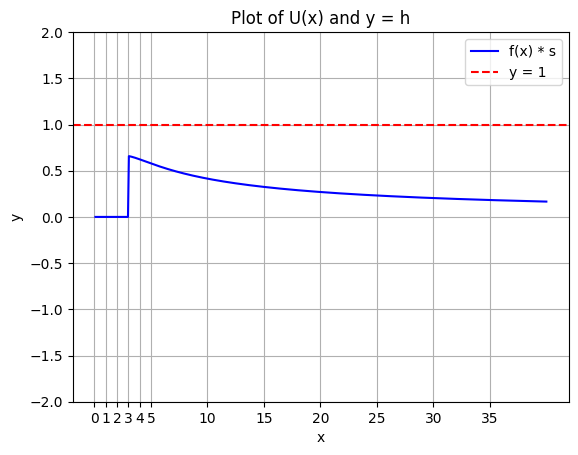

In [29]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Definition of the function f(x) = ln(x)
def f(x):
    if x < m:
        return 0
    return math.log(x) / (x * 5)

def g(y):
    num = 1
    return num

# Parameters
s = 9
h = 1
m = 3

# Generate x values (avoid 0)
x_vals = np.linspace(0.1, 40, 500)

# Compute f(x)*s values
f_s_vals = [f(x) * s * g(1) for x in x_vals] # for an arbtrary y, for instance y = 1

# Plot f(x)*s
plt.plot(x_vals, f_s_vals, label="f(x) * s", color="blue")

# Plot y = h
plt.axhline(y=h, color="red", linestyle="--", label=f"y = {h}")

# Labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of U(x) and y = h")
plt.legend()
plt.grid(True)
plt.ylim(-2, 2)
plt.xticks([0, 1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35])

plt.show()


In [34]:
import math
import itertools

# Definition of the function f(x)
def f(x):
    numerator = math.log(x)/5
    return numerator

# Definition of the function g(y)
def g(y):
    # num = 1 - 0.01 * y
    num = 1
    return num

# Function to generate all valid group configurations
def generate_and_increment_arrays(p, m, n):
    valid_arrays = []

    # Each element in the array can be either 0 or a value >= m,
    # as long as the non-increasing order and the total sum <= n are satisfied.
    # To avoid infinite search, we naturally bound choices by remaining sum and previous value.

    def backtrack(idx, last_allowed, remaining_sum, current):
        # When we have built an array of length p, record it
        if idx == p:
            valid_arrays.append(list(current))
            return

        # Option 1: choose 0 here. After placing a 0, only 0s can follow to keep non-increasing order.
        current.append(0)
        backtrack(idx + 1, 0, remaining_sum, current)
        current.pop()

        # Option 2: choose a positive value v >= m, but not exceeding last_allowed and remaining_sum
        # This enforces non-increasing order and total-sum constraint.
        upper = min(last_allowed, remaining_sum)
        for v in range(upper, m - 1, -1):
            current.append(v)
            backtrack(idx + 1, v, remaining_sum - v, current)
            current.pop()

    # Start the backtracking with the widest allowed value (n) and full remaining sum (n)
    backtrack(idx=0, last_allowed=n, remaining_sum=n, current=[])
    return valid_arrays



def process_allcases(allcases, s, h, p, n):
    nash_equilibria = []
    for idx, array in enumerate(allcases):
        print(f"\nProcessing array {idx + 1}: {array}")
        con = 1
        counter = 1
        y = sum(1 for x in array if x != 0)

        for num in array:
            if num == 0:
                break  # Skip further checks after the first 0
            else:
                U_current = (s * f(num) * g(y)) / num

                # NEW boundary rule: if we "reach n", only check h < U_current
                if num == n:
                    if not (h < U_current):   # strict inequality per your request
                        con = 0
                else:
                    U_next = (s * f(num + 1) * g(y)) / (num + 1)
                    if not (U_next <= h <= U_current):
                        con = 0

            counter += 1
            print(num, end=" ")

        if array == [0] * p:
            con = 1  # Always a Nash equilibrium

        print("\n condition (its a Nash equilibrium = 1 / its not = 0):")
        print(con)

        if con == 1:
            nash_equilibria.append(array)

    return nash_equilibria


# Parameters
m = 3  # Value for `m`
s = 9  # Value of the s
h = 1  # Value of the h
n = 30 # Number of hunters
p = n // m  # Size of the array

# Generate and print the arrays
allcases = generate_and_increment_arrays(p, m, n)

print("Groups that are formed:")
for case in allcases:
    print(case)

# Process the arrays as described
print("\nProcessing allcases:")
nash_list = process_allcases(allcases, s, h, p, n)  # <-- capture result

# ---- print all Nash equilibria in one place
print("\nAll Nash equilibria (collected):")
for arr in nash_list:
    print(arr)
print(f"\nTotal Nash equilibria: {len(nash_list)}")


Groups that are formed:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[30, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[29, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[28, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[27, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[27, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[26, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[26, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[26, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 5, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[25, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 6, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 5, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[24, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[23, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 6, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 5, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 4, 3, 0, 0, 0, 0, 0, 0, 0]
[23, 3, 0, 0, 0, 0, 0, 0, 0, 0]
[23, 3, 3, 0, 0, 0, 0, 0, 0, 0]
[22, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 8, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 7, 0, 0, 0, 0, 0, 0, 0, 0]
[22, 6, 0, 0, 0, 